In [1]:
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=944326131ac1cc2e9f9ec487650492eb706651bf9e042dadf9e3a8dd93f4f9f0
  Stored in directory: /root/.cache/pip/wheels/b9/2c/cb/d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [2]:
from datetime import date
from nsepy import get_history
import pandas as pd

In [3]:
def obtain_data(ticker,start,end):
# Enter the start and end dates using the method date(yyyy,m,dd)    
    stock=get_history(symbol=ticker,start=start,end=end)
    df=stock.copy()
    df=df.reset_index()
    df=df.drop(['Series','Prev Close','Last','Turnover','%Deliverble','Trades'],axis=1)
    df=df.rename({'Open':'open_price','Close':'close_price','High':'high','Low':'low','Volume':'volume'},axis='columns')
    df.index=df.Date
    return df

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
"""This cell defineds the plot_candles function"""

def plot_candles(pricing, title=None, volume_bars=False, color_function=None, technicals=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open_price', 'close_price', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      technicals: A list of additional data series to add to the chart.  Must be the same length as pricing.
    """
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price[index] > close_price[index] else 'g'
    color_function = color_function or default_color
    technicals = technicals or []
    open_price = pricing['open_price']
    close_price = pricing['close_price']
    low = pricing['low']
    high = pricing['high']
    oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
    oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)
    
    if volume_bars:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]},figsize=(7,7))
    else:
        fig, ax1 = plt.subplots(1, 1)
    if title:
        ax1.set_title(title)
    fig.tight_layout()
    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low, high) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x , low, high, color=candle_colors, linewidth=1)
    ax1.xaxis.grid(True)
    ax1.yaxis.grid(True)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    ax1.set_yticklabels([])
    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%d-%m-%Y'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
    #plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
    for indicator in technicals:
        ax1.plot(x, indicator)
    
    if volume_bars:
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        #ax2.set_title(volume_title)
        ax2.xaxis.grid(True)
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
    return fig    

In [ ]:
equities=['RELIANCE','INFY','HDFC','HDFCBANK','HDFCLIFE','ZEEL','DELTACORP','ITC','ASIANPAINT']
for equity in equities :
    df_pricing=obtain_data(equity,date(2018,1,1),date(2020,9,1))
    df=df_pricing.copy()
    df=df.reset_index(drop=True)
    n_days=5
    fraction_movement=0.037
    df['Trend']=None
    for i in range(len(df)):
        try :
            for n in range(n_days): 
                if  df.loc[i,'close_price'] - df.loc[i+n,'close_price'] >= fraction_movement*df.loc[i,'close_price']:
                    df.loc[i,'Trend'] ='Down'
                    if i >=20 :
                        fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                        fig.savefig("drive/MyDrive/Data/CandleData/Down/{0}{1}.png".format(df_pricing['Symbol'][i],i),dpi=70)
                    print('Down',i,n)
                    break
                elif df.loc[i+n,'close_price'] - df.loc[i,'close_price'] >= fraction_movement*df.loc[i,'close_price'] :
                    df.loc[i,'Trend']='Up'
                    if i >20 :    
                        fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                        fig.savefig("drive/MyDrive/Data/CandleData/Up/{0}{1}.png".format(df_pricing['Symbol'][i],i),dpi=70)
                    print('Up',i,n)
                    break
                else :
                    df.loc[i,'Trend']= 'No Trend'
        except :
            print(i)
            pass

Output hidden; open in https://colab.research.google.com to view.

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
!pip install "torch==1.4" "torchvision==0.5.0"
!pip install "fastai==1.0.61"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.4/753.4 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.4.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.4.0 which is incompatible.
fastai 2.7.10 requi

In [8]:
from fastai.vision import *
from fastai.metrics import error_rate

In [9]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [10]:
from pathlib import Path
path=Path('drive/MyDrive/Data/CandleData')
path_save=Path('drive/MyDrive/Data/Processed')

In [11]:
path.ls()

[PosixPath('drive/MyDrive/Data/CandleData/Down'),
 PosixPath('drive/MyDrive/Data/CandleData/.ipynb_checkpoints'),
 PosixPath('drive/MyDrive/Data/CandleData/Up'),
 PosixPath('drive/MyDrive/Data/CandleData/models')]

In [12]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=3), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['Down', 'Up']

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.387497,1.033692,0.493023,01:24
1,1.275627,1.050920,0.483721,01:04
2,1.096563,0.818640,0.460465,01:10
3,0.967336,0.793957,0.460465,01:08


In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


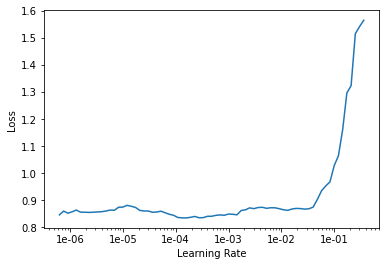

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.832339,0.824531,0.418605,01:28
1,0.824472,0.803320,0.483721,01:28
2,0.788142,0.770923,0.451163,01:30
3,0.727796,0.675664,0.374419,01:29
4,0.664248,0.669214,0.362791,01:29


In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


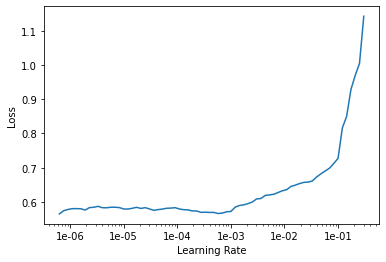

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.572904,0.648913,0.332558,01:29
1,0.548967,0.728142,0.362791,01:26
2,0.573034,0.796656,0.420930,01:18
3,0.564277,0.672823,0.341860,01:18
4,0.519322,0.738442,0.330233,01:20
5,0.480038,0.620905,0.295349,01:19
6,0.419189,0.561065,0.253488,01:18
7,0.356243,0.501201,0.202326,01:17
8,0.296227,0.523095,0.209302,01:19
9,0.252419,0.511463,0.197674,01:20


In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


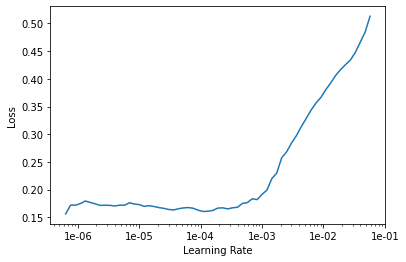

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(5, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.170199,0.548781,0.218605,01:21
1,0.180584,0.602361,0.216279,01:25
2,0.180240,0.629916,0.227907,01:31
3,0.168816,0.609869,0.227907,01:25
4,0.148105,0.614111,0.225581,01:23


In [26]:
learn.save('First Model')

In [27]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=3), size=352, num_workers=4).normalize(imagenet_stats)

In [28]:
learn.data=data

In [29]:
gc.collect()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


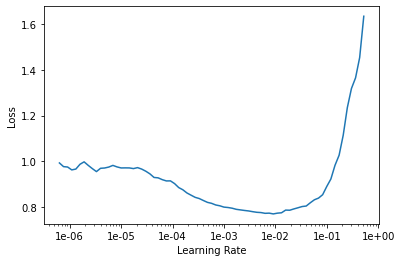

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(5,max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.782334,1.786913,0.469767,03:00
1,0.873269,41.905727,0.458140,02:59
2,0.882582,0.845861,0.502326,02:52
3,0.850927,0.754046,0.500000,02:53
4,0.820880,0.689208,0.483721,02:51


In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


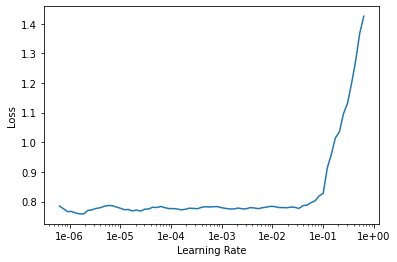

In [33]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.770445,0.687980,0.453488,02:49
1,0.755654,0.686953,0.453488,02:52
2,0.746153,0.687028,0.446512,02:51
3,0.753909,0.686692,0.462791,02:50
4,0.762665,0.687047,0.467442,02:51


In [36]:
learn.save('Model 2')

In [78]:
correcti=0
list_down=[]
list_up=[]
for i in range(len(data.valid_ds)):
    prediction=learn.predict(data.valid_ds[i][0])
    if str(data.valid_ds[i][1])=="Down" and bool(prediction[1]==0) :
        correcti=correcti+1
        if prediction[2][0] >= 0.55 :
            list_down=list_down + [i]
            #print(prediction)
            #print()
    if str(data.valid_ds[i][1])=="Up" and bool(prediction[1]==1) :
        correcti=correcti+1
        if prediction[2][1] >= 0.55 :
            list_up=list_up + [i]
            #print(prediction)
            #print()
        

In [79]:
len(list_down),len(list_up)

(0, 37)

Up


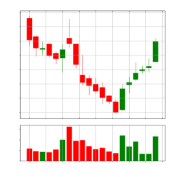

In [80]:
idx=100
x,y = data.valid_ds[idx]
x.show()
print(data.valid_ds.y[idx])

In [81]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])

In [82]:
m = learn.model.eval()

In [83]:
from fastai.callbacks.hooks import *

In [84]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [85]:
hook_a,hook_g = hooked_backward()

In [86]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [87]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [88]:
def show_heatmap(hm):
    fig,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');
    return fig

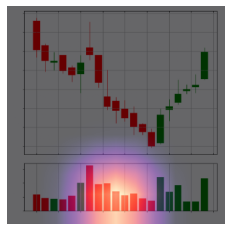

In [89]:
answer=show_heatmap(avg_acts)
answer.savefig(path/'trial.png')